### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
import nest_asyncio
import nltk
import pickle
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Python Standard Library
from dataclasses import dataclass
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
ratings = pd.read_csv('../data/ratings-2022-02-21.tsv', sep="\t")
notes = pd.read_csv('../data/notes-2022-02-21.tsv', sep="\t")

### Load Data

In [ ]:
ratings.columns

Index(['noteId', 'participantId', 'createdAtMillis', 'version', 'agree',
       'disagree', 'helpful', 'notHelpful', 'helpfulnessLevel', 'helpfulOther',
       'helpfulInformative', 'helpfulClear', 'helpfulEmpathetic',
       'helpfulGoodSources', 'helpfulUniqueContext', 'helpfulAddressesClaim',
       'helpfulImportantContext', 'helpfulUnbiasedLanguage', 'notHelpfulOther',
       'notHelpfulIncorrect', 'notHelpfulSourcesMissingOrUnreliable',
       'notHelpfulOpinionSpeculationOrBias', 'notHelpfulMissingKeyPoints',
       'notHelpfulOutdated', 'notHelpfulHardToUnderstand',
       'notHelpfulArgumentativeOrBiased', 'notHelpfulOffTopic',
       'notHelpfulSpamHarassmentOrAbuse', 'notHelpfulIrrelevantSources',
       'notHelpfulOpinionSpeculation', 'notHelpfulNoteNotNeeded'],
      dtype='object')

In [ ]:
# ratings = pd.read_csv('../data/ratings-2021-12-10.tsv', sep="\t")
# ratings_labels = ratings.iloc[:, 5:13].columns

positive_ratings = ratings.iloc[:, [x for x in range(8, 18)]]
negative_ratings = ratings.iloc[:, [x for x in range(18, 31)]]
agree_disagree = ratings.iloc[:, 4:6]
time = ratings['createdAtMillis']       

# notes = pd.read_csv('../data/notes-2021-12-10.tsv', sep="\t")

notesWithRatings = ratings.set_index('noteId').join(notes.set_index('noteId'), lsuffix="_note", rsuffix="_rating", how='inner')

p = positive_ratings.astype(bool).sum(axis=0)
n = negative_ratings.astype(bool).sum(axis=0)
ad = agree_disagree.astype(bool).sum(axis=0)

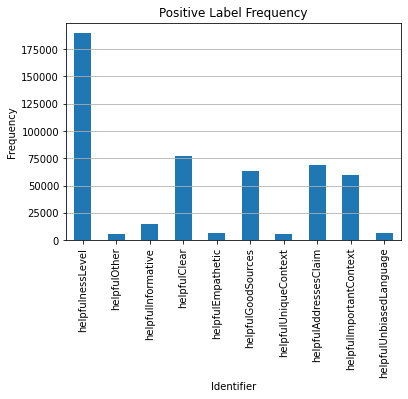

In [ ]:
p.plot(kind='bar', xlabel = 'Identifier', ylabel = 'Frequency', title ='Positive Label Frequency').grid(axis='y')

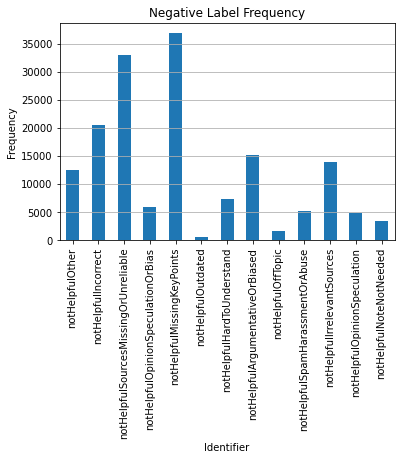

In [ ]:
n.plot(kind='bar', xlabel = 'Identifier', ylabel = 'Frequency', title ='Negative Label Frequency').grid(axis='y')

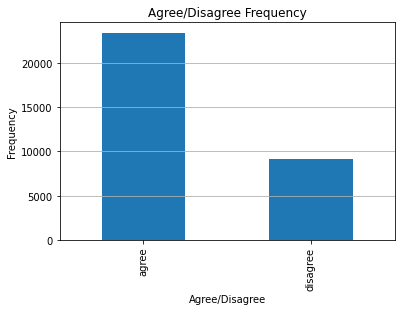

In [ ]:
ad.plot(kind='bar', xlabel = 'Agree/Disagree', ylabel = 'Frequency', title ='Agree/Disagree Frequency').grid(axis='y')

count    3801.000000
mean        6.682978
std        39.696914
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      1734.000000
Name: participantId, dtype: float64

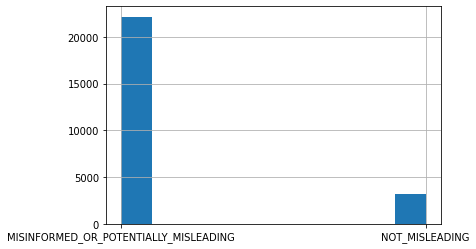

In [ ]:
notes['classification'].hist()
notes['classification'].count()

notes_count = notes['participantId'].value_counts()
ratings_count = ratings['participantId'].value_counts()
notes_count.describe()


<AxesSubplot:>

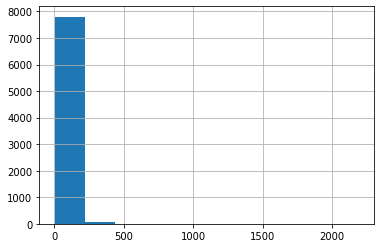

In [ ]:
ratings_count.hist()

<AxesSubplot:>

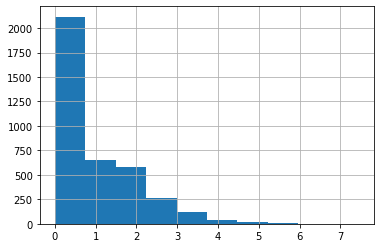

In [ ]:
np.log(notes_count).hist()

In [ ]:
ratings['participantId'].value_counts().describe()

count    7884.000000
mean       24.066971
std        67.633206
min         1.000000
25%         3.000000
50%         9.000000
75%        23.000000
max      2192.000000
Name: participantId, dtype: float64

In [ ]:
len(ratings)

160381

In [ ]:
len(notes)

22024

In [ ]:
tweets = pd.read_csv('../data/noted-tweets.csv', sep=",")

In [ ]:
tweets.tail()

,Unnamed: 0,tweetId,username,userId,text,time,link
12703,0,1441489899744415749,cherylhe,2.644726e+07,@POTUS How did they all get there if they came...,2021-09-24 19:49:08+00:00,https://twitter.com/cherylhe/status/1441489899...
12704,1,1441544289209704451,AnnetteLedesm13,1.437927e+18,@CNN @DavidAndelman @CNNOpinion There is no gr...,2021-09-24 23:25:15+00:00,https://twitter.com/AnnetteLedesm13/status/144...
12705,2,1441548083616227328,ssaalaah_s6s6,1.594150e+09,@CNN @DavidAndelman @CNNOpinion In response to...,2021-09-24 23:40:20+00:00,https://twitter.com/ssaalaah_s6s6/status/14415...
12706,3,1441615295790018564,korovamilkman,1.228582e+18,@CNN @CNNOpinion Election fraud,2021-09-25 04:07:25+00:00,https://twitter.com/korovamilkman/status/14416...
12707,4,1436065906577268745,grewal307,7.174294e+17,@thetimes Highly doubt it...it was planned...,2021-09-09 20:36:07+00:00,https://twitter.com/grewal307/status/143606590...


In [ ]:
with open('../data/processed.pickle', 'rb') as handle:
    dictionary = pickle.load(handle)

In [ ]:
_notes = dictionary['notes 02/01/2022']

In [ ]:
_notes.columns

Index(['participantId', 'createdAtMillis', 'tweetId', 'classification',
       'believable', 'harmful', 'validationDifficulty', 'misleadingOther',
       'misleadingFactualError', 'misleadingManipulatedMedia',
       'misleadingOutdatedInformation', 'misleadingMissingImportantContext',
       'misleadingUnverifiedClaimAsFact', 'misleadingSatire',
       'notMisleadingOther', 'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary',
       'classification_quant', 'believable_quant', 'harmful_quant',
       'val_quant', 'links', 'clean_summary', 'has_questionmark',
       'has_exclamationmark', 'has_period', 'num_upper', 'has_digit',
       'char_count', 'num_links', 'has_links', 'clean_txt', 'Polarity',
       'Subjectivity', 'notHelpful', 'helpfulOther', 'helpful_quant',
       'helpfulInformative', 'helpfulClear', 'helpfulEmpathetic',
       'helpfulGoodSources

In [ ]:
len(_notes[_notes.helpful_quant > .84])

7072

In [ ]:
len(_notes[_notes.counts > 5])

7485

In [ ]:
len(_notes[(_notes.helpful_quant > .84) & (_notes.counts > 5)])

2281

In [ ]:
len(notesWithRatings)

189744

In [ ]:
len(notes)

25402

In [ ]:
len(ratings)

189744

In [ ]:
1356735932087611400

In [ ]:
temp = ratings.groupby('noteId').size()


In [ ]:
_notes['counts'] = ratings.groupby('noteId').size()

In [ ]:
_notes

,participantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,misleadingManipulatedMedia,...,notHelpfulOutdated,notHelpfulHardToUnderstand,notHelpfulArgumentativeOrBiased,notHelpfulOffTopic,notHelpfulSpamHarassmentOrAbuse,notHelpfulIrrelevantSources,helpfulUnbiasedLanguage,notHelpfulOpinionSpeculation,notHelpfulNoteNotNeeded,counts
noteId,,,,,,,,,,,,,,,,,,,,,
1354870745806086150,7EDD07641861C52611BCEB9F9BE7CD21,1611861332737,1353031711349739523,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1355716996760023041,7EDD07641861C52611BCEB9F9BE7CD21,1612063094689,1355643797280083973,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1355989178622816256,7EDD07641861C52611BCEB9F9BE7CD21,1612127987903,1355529775197130753,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1356735932087611399,7EDD07641861C52611BCEB9F9BE7CD21,1612306027803,1352754599590035459,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1356747779113177095,7EDD07641861C52611BCEB9F9BE7CD21,1612308852353,1356441140959064064,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441550385357811719,00DBE37DBD6AD303B0ED1547DD60867D,1632527369236,1441544289209704451,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,LITTLE_HARM,EASY,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1441551497670524933,00DBE37DBD6AD303B0ED1547DD60867D,1632527634435,1441548083616227328,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_FEW,CONSIDERABLE_HARM,EASY,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1441627211849613315,00DBE37DBD6AD303B0ED1547DD60867D,1632545686101,1441615295790018564,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0e62a2c-7f45-414e-8164-5bf51e09d482' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>